In [87]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import timeit
%matplotlib inline

In [78]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.5):
          print("\nReached 0.4 loss so cancelling training!")
          self.model.stop_training = True

cb = myCallback()

In [79]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.fashion_mnist.load_data()

9


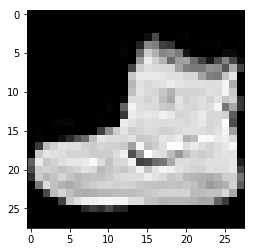

In [48]:
plt.imshow(train_data[0], cmap='gray')
print(train_labels[0])

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [50]:
http://localhost:9898/?token=e68cb43f2813e23f4ee7fe0118c1e468b8bfc527280e3751
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

In [51]:
start = timeit.default_timer()

model.fit(train_data, train_labels, epochs=50, verbose=1, callbacks = [cb])

stop = timeit.default_timer()

print('Time: ', stop - start)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/sample - loss: 3.6105 - accuracy: 0.7052
Epoch 2/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.6532 - accuracy: 0.7691
Epoch 3/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5896 - accuracy: 0.7929
Epoch 4/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5474 - accuracy: 0.8117
Epoch 5/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5125 - accuracy: 0.8216
Epoch 6/50
59744/60000 [============================>.] - ETA: 0s - loss: 0.4982 - accuracy: 0.8277
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 3s 44us/sample - loss: 0.4984 - accuracy: 0.8275
Time:  15.579793503995461


In [ ]:
start = timeit.default_timer()

print(model.evaluate(x = test_data, y = test_labels, verbose=0))

stop = timeit.default_timer()

print('Time: ', stop - start)

## Sacled training images and test images

In [8]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [10]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
start = timeit.default_timer()

print(model.fit(train_data, train_labels, epochs=50, verbose=1))

stop = timeit.default_timer()

print('Time: ', stop - start)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4924 - accuracy: 0.8262
Epoch 2/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3710 - accuracy: 0.8663
Epoch 3/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3329 - accuracy: 0.8787
Epoch 4/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3087 - accuracy: 0.8858
Epoch 5/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2904 - accuracy: 0.8942
Epoch 6/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2767 - accuracy: 0.8971
Epoch 7/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2649 - accuracy: 0.9018
Epoch 8/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2548 - accuracy: 0.9042
Epoch 9/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2438 - accuracy: 0.9084
Epoch 10/50
60

In [12]:
start = timeit.default_timer()

print(model.evaluate(x = test_data, y = test_labels, verbose=0))

stop = timeit.default_timer()

print('Time: ', stop - start)

[0.5089136445343494, 0.8855]
Time:  0.35111355599656235


## Convolution Layer

Getting same accuracy in very less epochs due to conv layers as it uses feature extraction and reduces noisy features

In [80]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [81]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

In [83]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [84]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_27 (Dense)             (None, 10)              

In [85]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
start = timeit.default_timer()

print(model.fit(train_data, train_labels, epochs=50, verbose=1))

stop = timeit.default_timer()

print('Time: ', stop - start)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 25s 417us/sample - loss: 0.4414 - accuracy: 0.8399
Epoch 2/50
60000/60000 [==============================] - 30s 498us/sample - loss: 0.2949 - accuracy: 0.8914
Epoch 3/50
60000/60000 [==============================] - 30s 503us/sample - loss: 0.2491 - accuracy: 0.9077
Epoch 4/50
60000/60000 [==============================] - 30s 498us/sample - loss: 0.2180 - accuracy: 0.9184
Epoch 5/50
60000/60000 [==============================] - 29s 491us/sample - loss: 0.1909 - accuracy: 0.9289
Epoch 6/50
60000/60000 [==============================] - 29s 476us/sample - loss: 0.1677 - accuracy: 0.9362
Epoch 7/50
60000/60000 [==============================] - 30s 508us/sample - loss: 0.1477 - accuracy: 0.9434
Epoch 8/50
60000/60000 [==============================] - 32s 535us/sample - loss: 0.1289 - accuracy: 0.9505
Epoch 9/50
60000/60000 [==============================] - 33s 548us/sample - loss: 0.1135 - accuracy: 0.9

In [89]:
start = timeit.default_timer()

print(model.evaluate(x = test_data, y = test_labels, verbose=0))

stop = timeit.default_timer()

print('Time: ', stop - start)

[0.4534188562698662, 0.9062]
Time:  1.9241684740118217
